# Statsmodels Time Series Exercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [ ]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/fellmir/pyTimeSeriesDataAnalysis/main/input_data/EnergyProduction.csv'

df = pd.read_csv(url, index_col=0, parse_dates=True)
df.head()

### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [2]:
# CODE HERE
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [2]:
# DON'T WRITE HERE

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

<Axes: xlabel='DATE'>

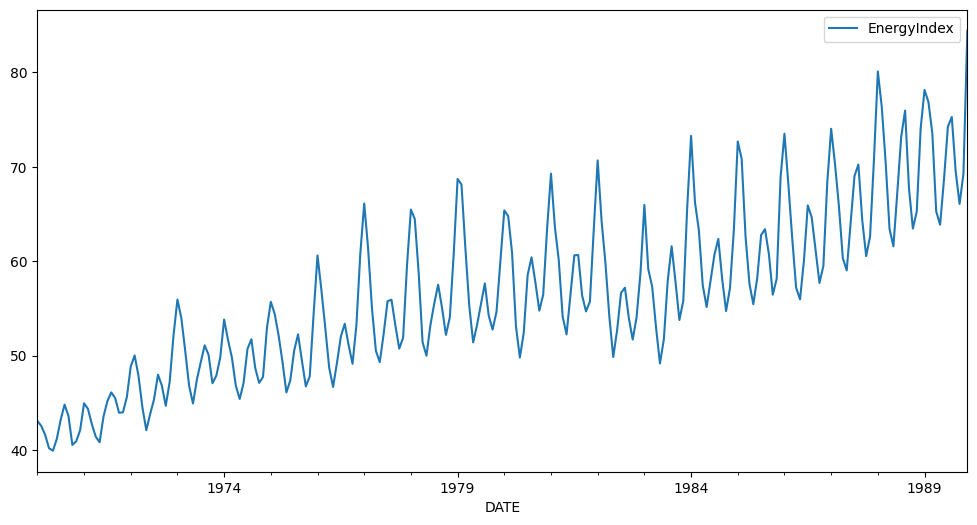

In [4]:
# CODE HERE
df.plot(figsize=(12,6))

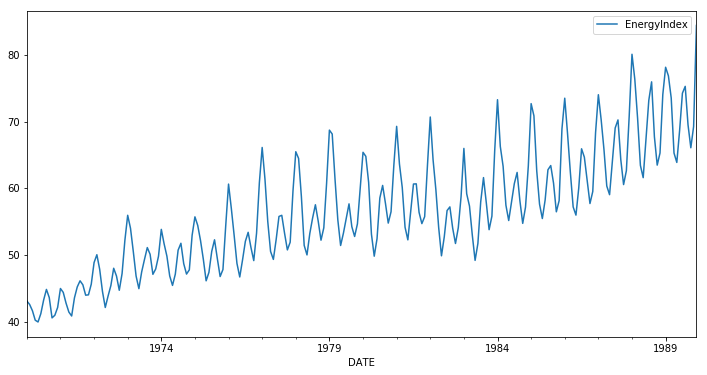

In [3]:
# DON'T WRITE HERE

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

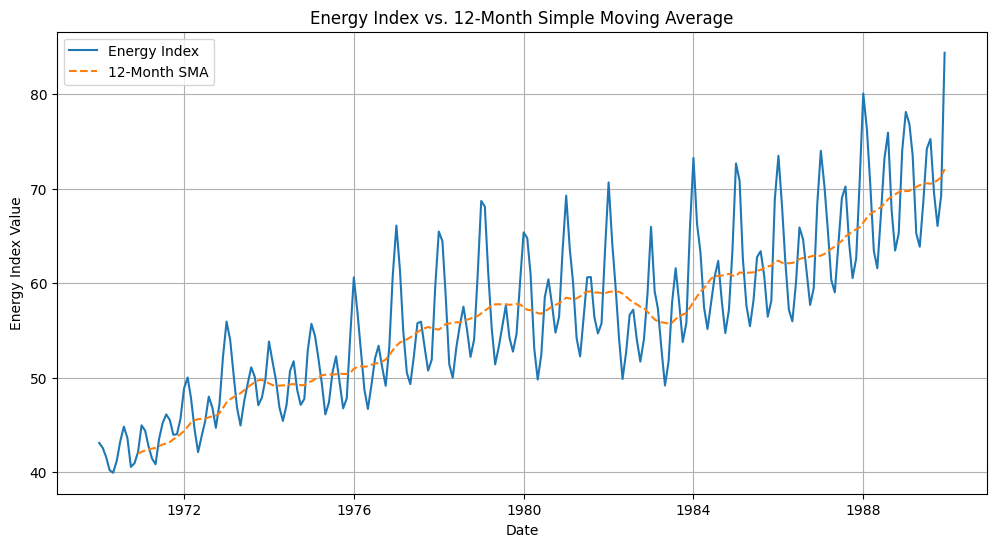

In [5]:
import matplotlib.pyplot as plt

df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['EnergyIndex'], label='Energy Index')
plt.plot(df['SMA12'], label='12-Month SMA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Energy Index Value')
plt.title('Energy Index vs. 12-Month Simple Moving Average')
plt.legend()
plt.grid(True)

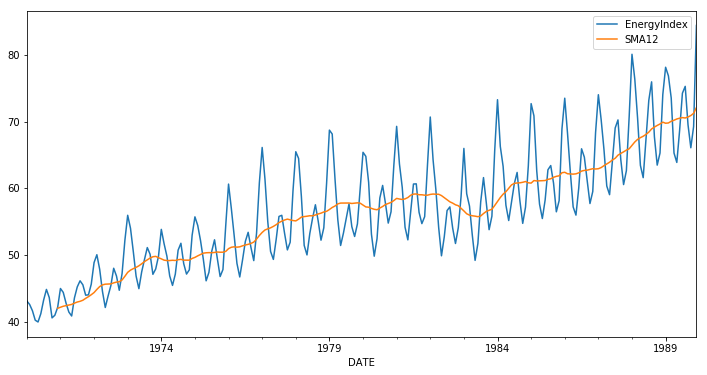

In [4]:
# DON'T WRITE HERE

### 3.1. Make an ETS decomposition of the dataset

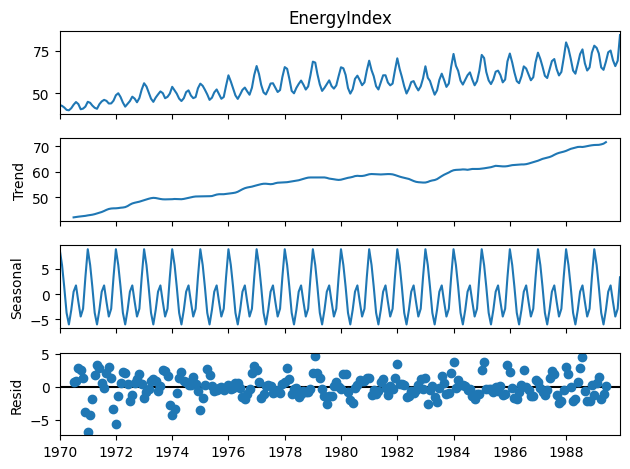

In [10]:
import statsmodels.api as sm

result_add = sm.tsa.seasonal_decompose(df['EnergyIndex'], model='additive')

result_add.plot()
plt.show()

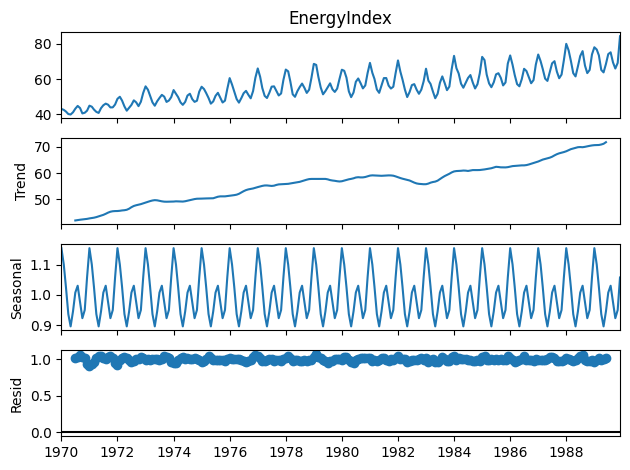

In [11]:
result_multi = sm.tsa.seasonal_decompose(df['EnergyIndex'], model='multiplicative')

result_multi.plot()
plt.show()

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

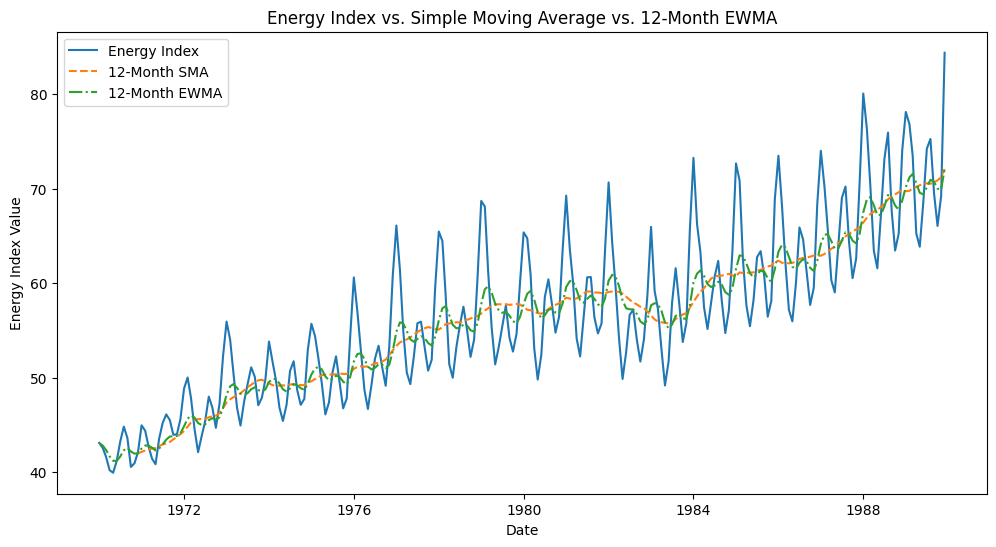

In [16]:
# DON'T FORGET TO PERFORM THE IMPORT!
df['EWMA12'] = df['EnergyIndex'].ewm(span=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['EnergyIndex'], label='Energy Index')
plt.plot(df['SMA12'], label='12-Month SMA', linestyle='--')
plt.plot(df['EWMA12'], label='12-Month EWMA', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Energy Index Value')
plt.title('Energy Index vs. Simple Moving Average vs. 12-Month EWMA')
plt.legend()
# plt.grid(True)

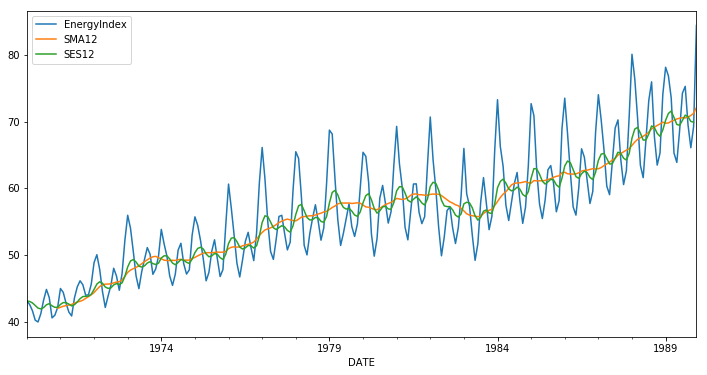

In [5]:
# DON'T WRITE HERE

### 4.1. Add a column to the DataFrame that shows a Holt's fitted model using Double Exponential Smoothing with multiplicative models. Plot the result.

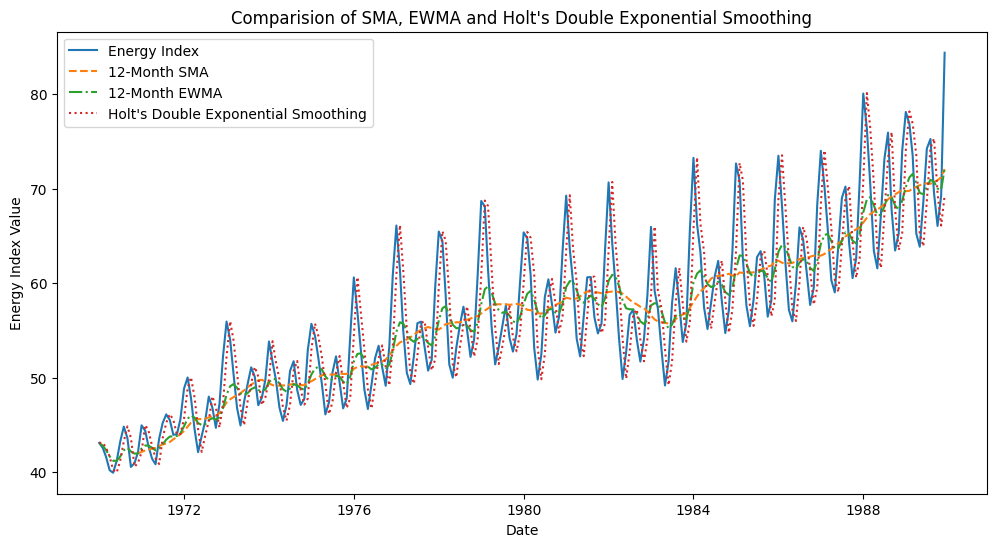

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['EnergyIndex'], trend='mul')
model_fit = model.fit()

df['Holt'] = model_fit.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df['EnergyIndex'], label='Energy Index')
plt.plot(df['SMA12'], label='12-Month SMA', linestyle='--')
plt.plot(df['EWMA12'], label='12-Month EWMA', linestyle='-.')
plt.plot(df['Holt'], label='Holt\'s Double Exponential Smoothing', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Energy Index Value')
plt.title('Comparision of SMA, EWMA and Holt\'s Double Exponential Smoothing')
plt.legend()
# plt.grid(True)

In [18]:
df.head()

,EnergyIndex,SMA12,EWMA12,Holt
DATE,,,,
1970-01-01,43.0869,NaN,43.086900,43.087050
1970-02-01,42.5577,NaN,42.800250,43.114456
1970-03-01,41.6215,NaN,42.340184,42.584917
1970-04-01,40.1982,NaN,41.664043,41.648116
1970-05-01,39.9321,NaN,41.193480,40.223903


### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

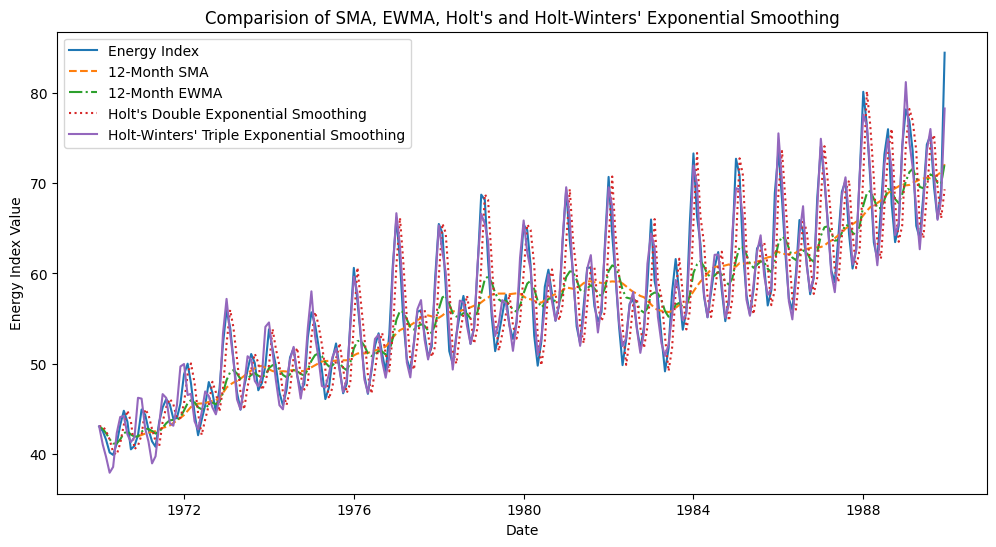

In [19]:
# DON'T FORGET TO PERFORM THE IMPORT!
model = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12)
model_fit = model.fit()

df['HoltWinters'] = model_fit.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df['EnergyIndex'], label='Energy Index')
plt.plot(df['SMA12'], label='12-Month SMA', linestyle='--')
plt.plot(df['EWMA12'], label='12-Month EWMA', linestyle='-.')
plt.plot(df['Holt'], label='Holt\'s Double Exponential Smoothing', linestyle=':')
plt.plot(df['HoltWinters'], label='Holt-Winters\' Triple Exponential Smoothing', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Energy Index Value')
plt.title('Comparision of SMA, EWMA, Holt\'s and Holt-Winters\' Exponential Smoothing')
plt.legend()

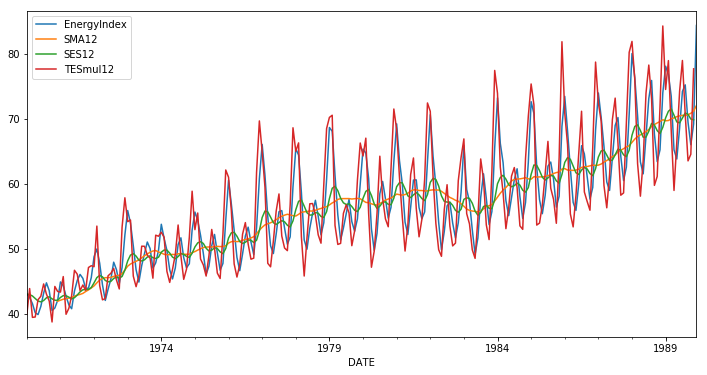

In [6]:
# DON'T WRITE HERE

### 5.1. Assess exponential smoothings with metrics of your choosing

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

models = ['SMA12', 'EWMA12', 'Holt', 'HoltWinters']

df_dropna = df.dropna()

for model in models:
    print(f"Performance Metrics for {model}:")
    print(f"MAE: {mean_absolute_error(df_dropna['EnergyIndex'], df_dropna[model])}")
    print(f"MSE: {mean_squared_error(df_dropna['EnergyIndex'], df_dropna[model])}")
    print(f"RMSE: {np.sqrt(mean_squared_error(df_dropna['EnergyIndex'], df_dropna[model]))}")
    print(f"MAPE: {mean_absolute_percentage_error(df_dropna['EnergyIndex'], df_dropna[model])}%")
    print("\n")

Performance Metrics for SMA12:
MAE: 3.8176094250363897
MSE: 23.110356659415636
RMSE: 4.807323232258846
MAPE: 6.436402321797777%


Performance Metrics for EWMA12:
MAE: 3.3620219688362347
MSE: 18.677594957949072
RMSE: 4.321758317855022
MAPE: 5.6673810724272045%


Performance Metrics for Holt:
MAE: 3.6299736578956745
MSE: 18.54211232747499
RMSE: 4.306055309384099
MAPE: 6.1628996754673055%


Performance Metrics for HoltWinters:
MAE: 1.0971272076265588
MSE: 2.1369254537518403
RMSE: 1.4618226478447516
MAPE: 1.9232180665963161%




$$\text{Given that Holt-Winters has the lowest scores in each of the metrics, it's clearly the best method here.}$$

### OPTIONAL: Plot the same  as above, but for only the first two years.

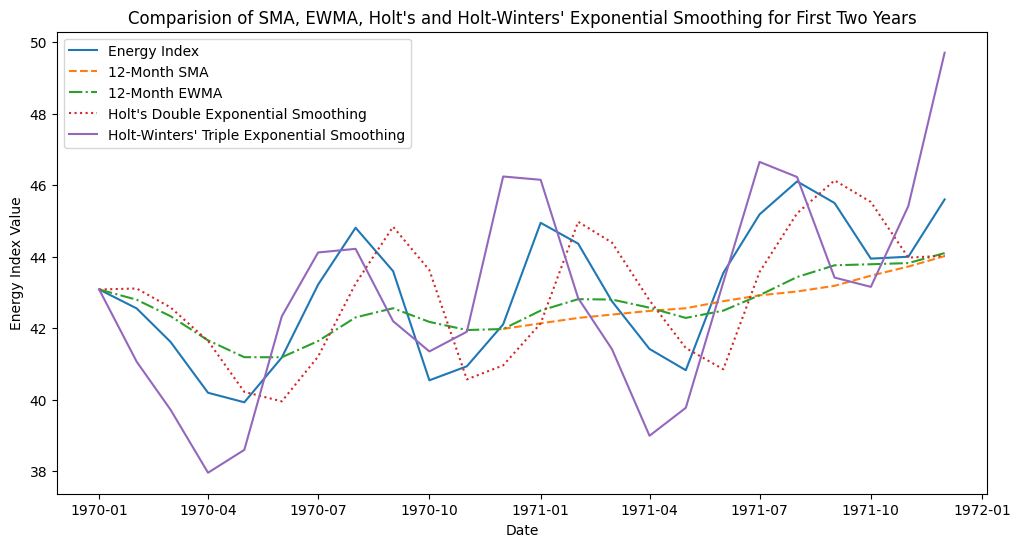

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df['EnergyIndex'].loc[:'1971-12-01'], label='Energy Index')
plt.plot(df['SMA12'].loc[:'1971-12-01'], label='12-Month SMA', linestyle='--')
plt.plot(df['EWMA12'].loc[:'1971-12-01'], label='12-Month EWMA', linestyle='-.')
plt.plot(df['Holt'].loc[:'1971-12-01'], label='Holt\'s Double Exponential Smoothing', linestyle=':')
plt.plot(df['HoltWinters'].loc[:'1971-12-01'], label='Holt-Winters\' Triple Exponential Smoothing', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Energy Index Value')
plt.title('Comparision of SMA, EWMA, Holt\'s and Holt-Winters\' Exponential Smoothing for First Two Years')
plt.legend()

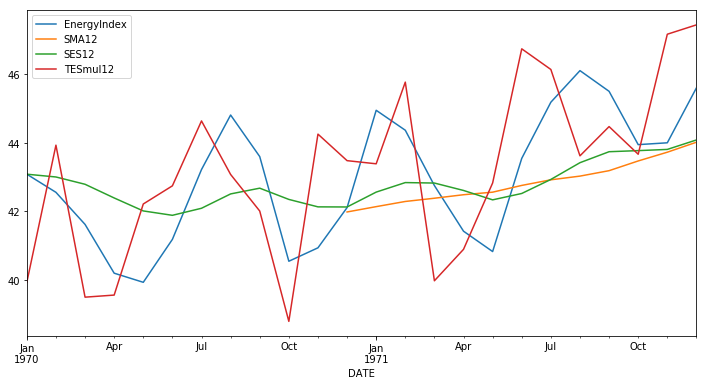

In [7]:
# DON'T WRITE HERE

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?

$$\text{A man called Volcker and his interest rate hike.}$$

## Great job!